In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Plot Simulated Annealing parameters

In [2]:
num_timesteps = 25
num_results = 40
results_list = []

for n in range(num_results):

    filename = 'example_output/simulated_annealing_%dtimesteps_%d.txt' % (num_timesteps, n)
    num_to_get = 5

    is_health = 0
    is_dur_dec = 0
    is_dur_rec = 0

    with open(filename, 'r') as f:
        results = {'distance': None, 'health': [], 'durations_declining': [], 'durations_recovering': []}
        count = 0
        for line in f:
            if line[:8] == 'DISTANCE':
                count += 1

            if line[:8] == 'DISTANCE' and count == num_to_get:
                results['distance'] = float(line[10:].strip('\n'))

            if is_health > 0 and is_health <= 3:
                temp = line.strip('\n').strip(']').strip('[').split()
                results['health'].append(np.array([float(x) for x in temp]))

                if is_health == 3:
                    is_health = 0
                else:
                    is_health += 1

            if line[:6] == 'HEALTH' and count == num_to_get:
                is_health += 1

            if is_dur_dec > 0 and is_dur_dec <= 3:
                temp = line.strip('\n').strip(']').strip('[').split()
                results['durations_declining'].append(np.array([float(x) for x in temp]))

                if is_dur_dec == 3:
                    is_dur_dec = 0
                else:
                    is_dur_dec += 1

            if line[:19] == 'DURATIONS DECLINING' and count == num_to_get:
                is_dur_dec += 1

            if is_dur_rec > 0 and is_dur_rec <= 3:
                temp = line.strip('\n').strip(']').strip('[').split()
                results['durations_recovering'].append(np.array([float(x) for x in temp]))

                if is_dur_rec == 3:
                    is_dur_rec = 0
                else:
                    is_dur_rec += 1

            if line[:20] == 'DURATIONS RECOVERING' and count == num_to_get:
                is_dur_rec += 1

    results_list.append(results)

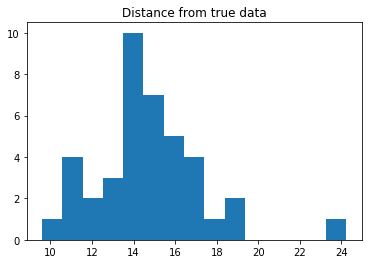

In [3]:
alist = [results['distance'] for results in results_list]
plt.hist(alist, bins=15)
plt.title('Distance from true data')
plt.show()

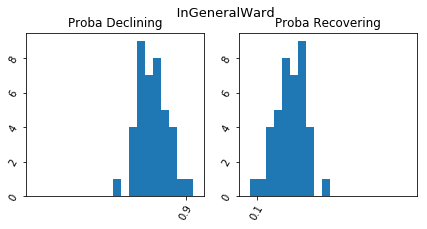

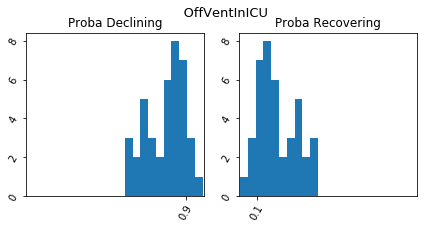

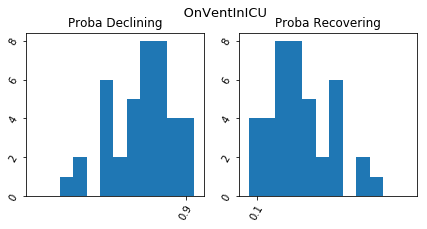

In [4]:
states_list = ['InGeneralWard', 'OffVentInICU', 'OnVentInICU']
true_list = [0.9, 0.1]

for i in range(3):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
    fig.suptitle("     %s" % states_list[i], y=1.0, fontsize=13)
    
    health_list = ['Proba Declining', 'Proba Recovering']
    for j in range(2):
        alist = [results['health'][i][j] for results in results_list]
        ax[j].hist(alist)
        ax[j].set_title(health_list[j])
        ax[j].set_xlim((0, 1))
        ax[j].set_xticks([true_list[j]])
        ax[j].tick_params(rotation=60)
        
    plt.show()

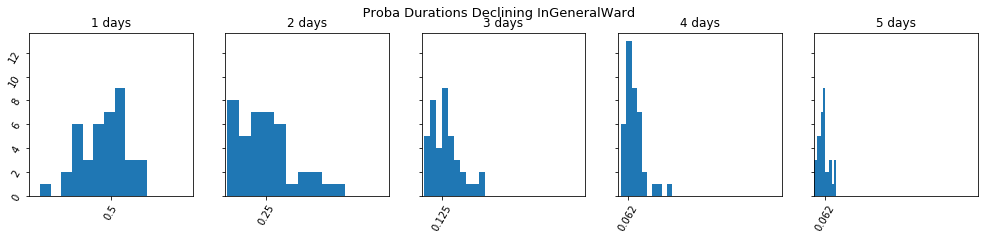

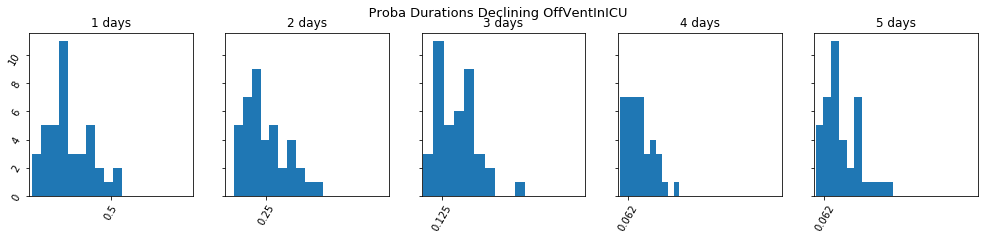

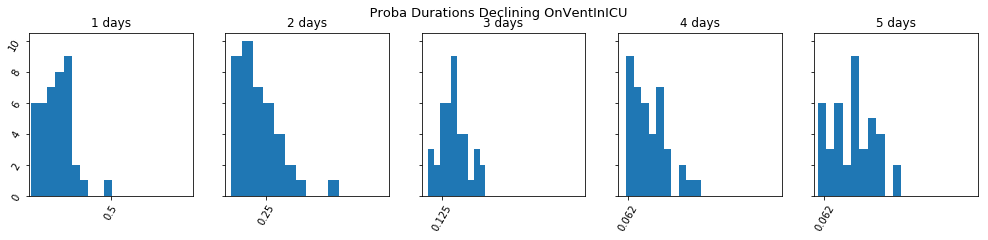

In [5]:
states_list = ['InGeneralWard', 'OffVentInICU', 'OnVentInICU']
true_list = [0.5, 0.25, 0.125, 0.0625, 0.0625]

for i in range(3):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(17, 3), sharey=True)
    fig.suptitle("     Proba Durations Declining %s" % states_list[i], y=1.0, fontsize=13)
    
    for j in range(5):
        alist = [results['durations_declining'][i][j] for results in results_list]
        ax[j].hist(alist, bins=10)
        ax[j].set_title('%d days' % (j+1))
        ax[j].set_xlim((0, 1))
        ax[j].set_xticks([true_list[j]])
        ax[j].tick_params(rotation=60)
        
    plt.show()

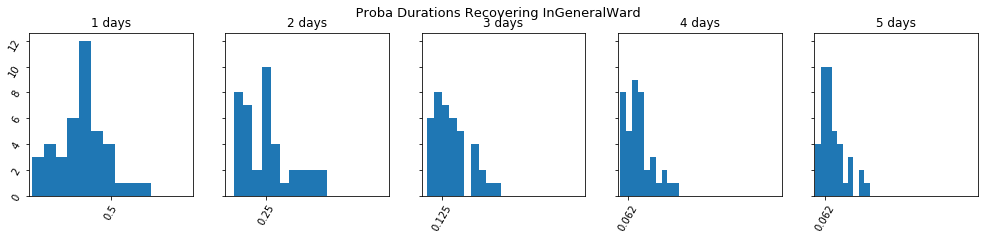

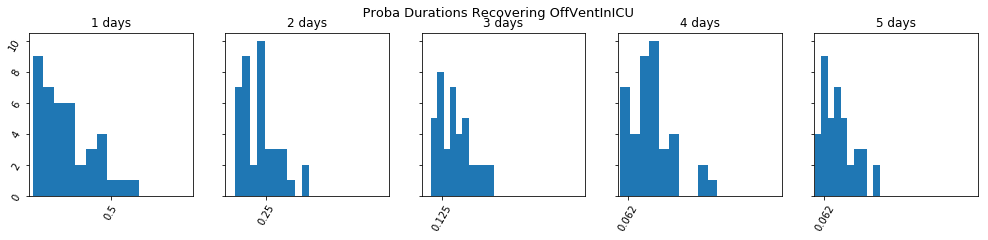

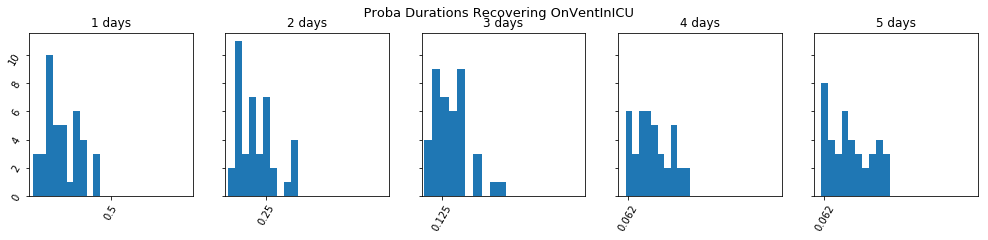

In [6]:
states_list = ['InGeneralWard', 'OffVentInICU', 'OnVentInICU']
true_list = [0.5, 0.25, 0.125, 0.0625, 0.0625]

for i in range(3):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(17, 3), sharey=True)
    fig.suptitle("     Proba Durations Recovering %s" % states_list[i], y=1.0, fontsize=13)
    
    for j in range(5):
        alist = [results['durations_recovering'][i][j] for results in results_list]
        ax[j].hist(alist)
        ax[j].set_title('%d days' % (j+1))
        ax[j].set_xlim((0, 1))
        ax[j].set_xticks([true_list[j]])
        ax[j].tick_params(rotation=60)
        
    plt.show()

In [84]:
a = np.asarray([[10, 20, 30], [20, 30, 40]])
print(a)
print(np.diff(a, axis=0))
print(a[1])
amin = np.max(a, axis=0)
print((np.abs(np.diff(a, axis=0)) + amin) / amin)
print(np.nansum((np.abs(np.diff(a, axis=0)) + amin) / amin) / 3)

[[10 20 30]
 [20 30 40]]
[[10 10 10]]
[20 30 40]
[[1.5        1.33333333 1.25      ]]
1.361111111111111


In [22]:
0.80*0.9996**(700*10)

0.04862080755583712

## Plot ABC parameters

# true probas:
    - durations: [0.5, 0.25, 0.125, 0.0625, 0.0625]
    - health [0.9, 0.1]

priors:
    - uniform: dirichlet with 1 count per choice
    - centered: dirichlet peaked at the center of the simplex
        - durations: [10, 10, 10, 10, 10]
        - health: [50, 50]
    - good: dirichlet peaked at values 'close' to the true ones
        - durations: [40, 30, 20, 10, 5]
        - health: [75, 25]

experiments:
    -  25 timesteps, ~10 incoming patients each day
    -  25 timesteps, ~50 incoming patients each day
    - 100 timesteps, ~10 incoming patients each day
    - 100 timesteps, ~50 incoming patients each day
    - 300 tiemsteps, ~50 incoming patients each day

[0.29533058 0.27593463 0.28630762 ... 0.28821605 0.27354593 0.28129241]
[0.36296856 0.34130822 0.35311842 ... 0.33109877 0.29656589 0.32383066]
[0.30885411 0.31666348 0.3205581  ... 0.30836826 0.28434729 0.29576563]
[0.38741375 0.39955571 0.37197651 ... 0.32675155 0.39433308 0.34828845]


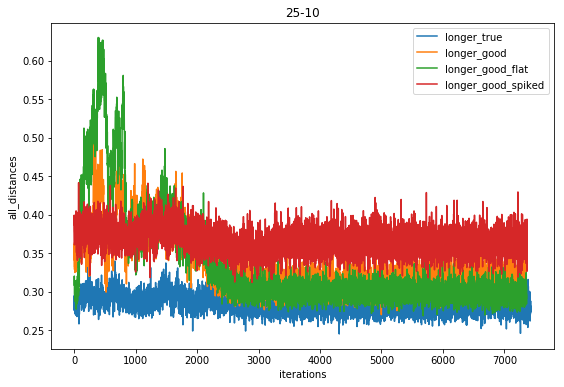

In [96]:
def plot_distances(priors, experiment, stat):
    stats = {}
    for prior in priors:
        stats[prior] = pd.read_csv('abc_results/abc_stats_%s_%s.csv' % (prior, experiment), index_col=0)

    plt.figure(figsize=(9,6))
    plt.title(experiment)
    for prior in priors:
        data = np.array(stats[prior][stat])
        print(data)
        data = data[~np.isnan(data)]
        plt.plot(data, label=prior)
    plt.ylabel(stat)
    plt.xlabel('iterations')
#     plt.yscale('log')
    plt.legend()
    plt.show()

experiment = '25-10'
stat = 'all_distances'  # all_distances, accepted_distances

priors = ['true', 'good', 'good_flat', 'good_spiked']
priors = ['longer_' + prior for prior in priors]
plot_distances(priors, experiment, stat)

Parameters wander around the prior until epsilon has decreased enough to guide the parameters towards better values.

In [98]:
states = ["Presenting", "InGeneralWard", "OffVentInICU", "OnVentInICU"]
durations = ['1', '2', '3', '4', '5']
prior = 'longer_good2'

with open('abc_results/abc_last_thetas_%s_%s.json' % (prior, experiment), 'r') as f:
    last_thetas = json.load(f)['last_thetas']
    last_thetas = last_thetas[-len(last_thetas) // 8 :]

In [99]:
# initialize results
results = {}
for theta in last_thetas:
    for state in states:
        results['proba_Recovering_given_%s' % state] = []
        results['pmf_duration_Recovering_%s' % state] = {}
        results['pmf_duration_Declining_%s' % state] = {}
        if state != 'Presenting':
            for dur in durations:
                results['pmf_duration_Recovering_%s' % state][dur] = []
                results['pmf_duration_Declining_%s' % state][dur] = []

# fill up results
for theta in last_thetas:
    for state in states:
        results['proba_Recovering_given_%s' % state].append(theta['proba_Recovering_given_%s' % state])
        if state != 'Presenting':
            for dur in durations:
                results['pmf_duration_Recovering_%s' % state][dur].append(theta['pmf_duration_Recovering_%s' % state][dur])
                results['pmf_duration_Declining_%s' % state][dur].append(theta['pmf_duration_Declining_%s' % state][dur])

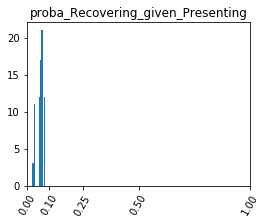

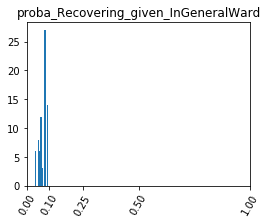

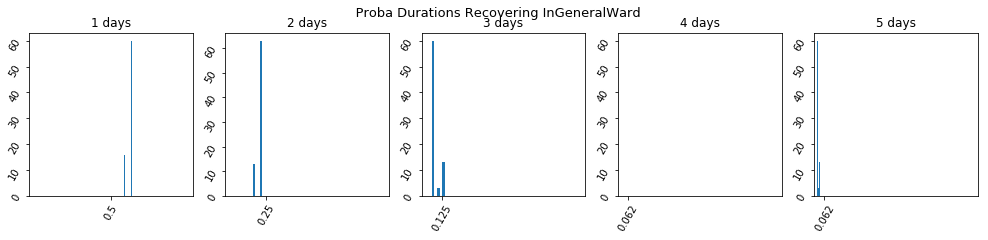

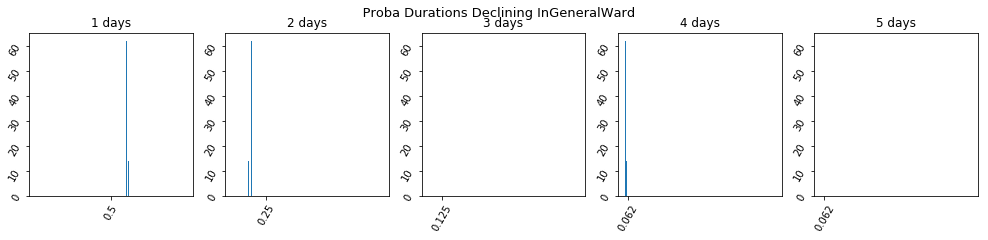

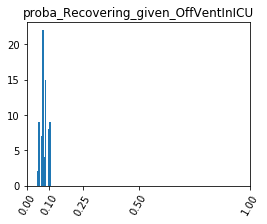

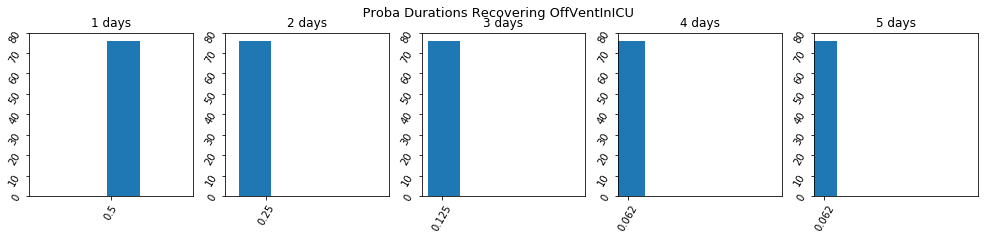

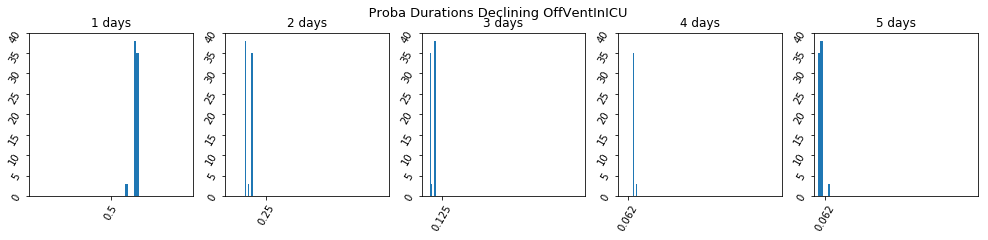

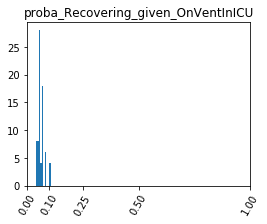

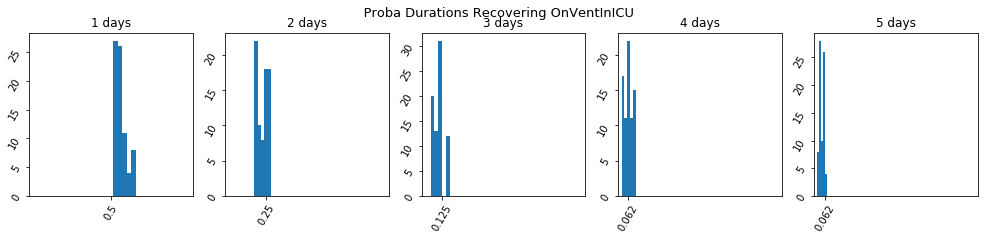

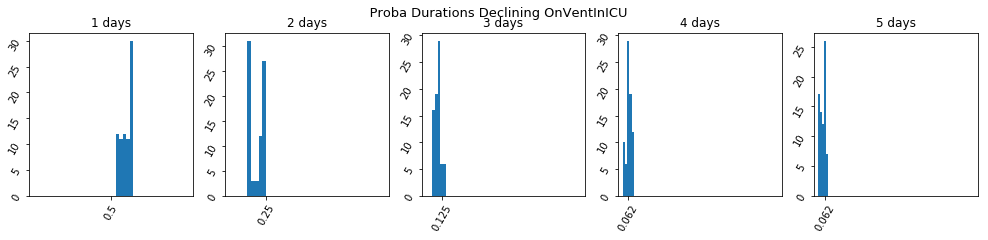

In [100]:
true_list = [0.5, 0.25, 0.125, 0.0625, 0.0625]

for state in states:
    plt.figure(figsize=(4, 3))
    plt.hist(results['proba_Recovering_given_%s' % state])
    plt.xticks([0.0, 0.1, 0.25, 0.5, 1.0], rotation=60)
    plt.title('proba_Recovering_given_%s' % state)
    plt.xlim((0, 1))
    plt.show()
    
    if state != 'Presenting':
        for health in ['Recovering', 'Declining']:
            fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(17, 3), sharey=False)
            fig.suptitle("     Proba Durations %s %s" % (health, state), y=1.0, fontsize=13)
            for i, dur in enumerate(durations):
                ax[i].hist(results['pmf_duration_%s_%s' % (health, state)][dur], bins=5)
                ax[i].set_title('%s days' % (dur))
                ax[i].set_xlim((0, 1))
                ax[i].set_xticks([true_list[i]])
                ax[i].tick_params(rotation=60)
            plt.show()

The probability of recovering is usually very accurate (10%). The duration probabilities while **declining** are usually very accurate, whereas the duration probabilities while **recovering** aren't. I suspect this is because most (90%) of patients decline, thus there are few patients who recover, thus it is less important, in terms of the "distance" to get the duration-while-recovering probabilities right.

The duration probabilities are more accurate earlier in the markov chain (i.e. in-general-ward). However, if there is enough data, they will be increasingly accurate later in the chain too (e.g. 300-50 has accurate probas even for on-vent-in-icu).

Using a **bad** prior (e.g. the 'centered' prior) is very bad, as expected. However, the parameters to shift towards the true ones.

Using the **good** prior does not necessarily give the best results. Actually, if there is enough data, it is not better than the **uniform** (i.e. uninformative) prior. the **good** prior is better for the 25-10 case, but, for the 25-50 case, there is interestingly no learning happening! It might be an outliar. However, it does seem that the prior provides some "inertia" that makes it thougher to shift the parameters towards the true ones.

## Distance computation:
Given the parallel summary statistics vectors $T_x$ (simulated) and $T_y$ (true), each of length $N$.  
Let $T_{max} = elementwiseMax(T_x, T_y)$, then:

$$
distance = \frac{\sum_{i}^{i \in vector} \frac{|T_x - T_y|}{T_{max}}}{N}
$$

#### Python code:
        a = np.array([T_x, self.T_y])
        denom = np.max(a, axis=0)
        distance = np.nansum((np.abs(np.diff(a, axis=0))) / denom) / T_x.shape[0]

This distance computes the absolute difference between summary statistics and divides it by the maximum of the two summary statistics.
Pros:
    - constrained between 0 and 1
    - no division by zero errors. Only 0/0 may accur, which gives a nan values, which is discarded by nansum.
Cons:
    - different distributions of statistics result in statistically different distances, given the same probability values (parameters that we are trying to recover). However, the fact that the distance is bound between 0 and 1 makes this issue practically insignificant.

#### Annealing of epsilon (distance threshold).
In ABC MCMC, the first step towards accepting parameters is whether the resulting distance is below a certain threshold, called epsilon. I found that the best ay is to anneal this epsilon. I anneal it in the following way:  


Let $A$ be the annealing factor and $\varepsilon_{best}$ the best (smallest and previously accepted) distance encountered thus far:  
Initialization: $\varepsilon \leftarrow 0.80$  
Annealing at each step: $\varepsilon \leftarrow max(\varepsilon_{best},\, \varepsilon A)$

I used A = 0.9996 and 700 * 10 = 7000 iterations

I could have initialized epsilon at 1, which would have been safer, but for the purpose of this experiment, especially to cut down runtime, I saw that 0.80 was high enough to start off.  
**Perhaps it would be smart to initialize epsilon slightly above the distance found using the initial parameters. Just add 0.1 or another fixed constant to it.**

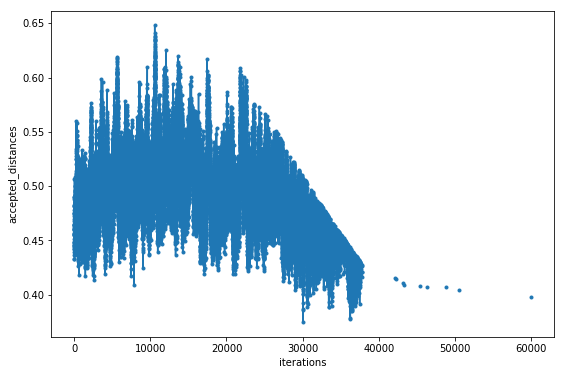

In [265]:
def plot_distances(priors, stat):
    stats = {}
    for prior in priors:
        stats[prior] = pd.read_csv(prior, index_col=0)

    plt.figure(figsize=(9,6))
    for prior in priors:
        data = np.array(stats[prior][stat])#[2000:2100]
#         print(data)
#         data = data[~np.isnan(data)]
        plt.plot(data, label=prior, marker='.')
    plt.ylabel(stat)
    plt.xlabel('iterations')
#     plt.yscale('log')
#     plt.legend()
    plt.show()

stat = 'accepted_distances'

# university_hospitals_birmingham_nhs_foundation_trust
# south_tees_hospitals_nhs_foundation_trust
# university_hospitals_of_north_midlands_nhs_trust
# manchester_university_nhs_foundation_trust

priors = ['NHS_results/abc_12000Iters_south_tees_hospitals_nhs_foundation_trust_Training_stats_20MaxEach_uniform.csv'] # 'NHS_results/abc_south_tees_hospitals_nhs_foundation_trust_TrainingAndTesting_stats_20MaxEach_normalizedstaircase.csv']
plot_distances(priors, stat)

In [2]:
states = ["InGeneralWard", "OffVentInICU", "OnVentInICU"]
durations = [str(x) for x in range(1, 21)]

with open('NHS_results/abc_12000Iters_south_tees_hospitals_nhs_foundation_trust_Training_last_thetas_20MaxEach_normalizedstaircase.json', 'r') as f:
    last_thetas = json.load(f)['last_thetas']
    first_theta = last_thetas[0]
    last_thetas = last_thetas[-100 :]

In [3]:
# initialize results
results = {}
for theta in last_thetas:
    for state in states:
        results['proba_Recovering_given_%s' % state] = []
        results['pmf_duration_Recovering_%s' % state] = {}
        results['pmf_duration_Declining_%s' % state] = {}
        if state != 'Presenting':
            for dur in durations:
                results['pmf_duration_Recovering_%s' % state][dur] = []
                results['pmf_duration_Declining_%s' % state][dur] = []

# fill up results
for theta in last_thetas:
    for state in states:
        results['proba_Recovering_given_%s' % state].append(theta['proba_Recovering_given_%s' % state])
        if state != 'Presenting':
            for dur in durations:
                results['pmf_duration_Recovering_%s' % state][dur].append(theta['pmf_duration_Recovering_%s' % state][dur])
                results['pmf_duration_Declining_%s' % state][dur].append(theta['pmf_duration_Declining_%s' % state][dur])

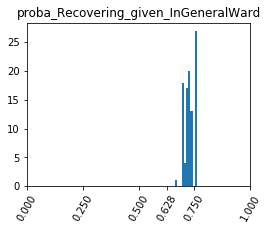

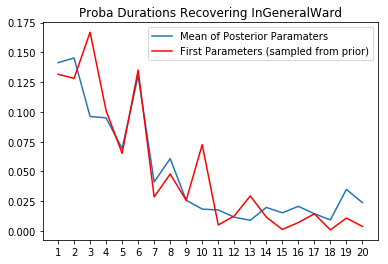

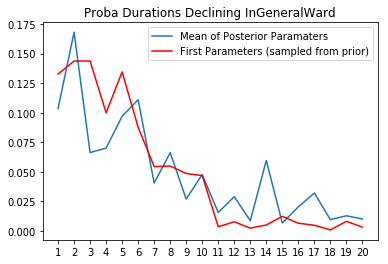

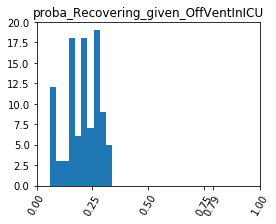

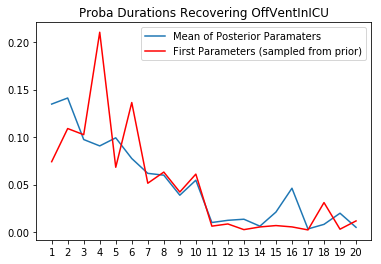

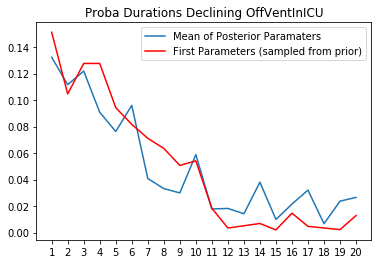

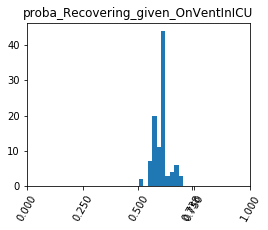

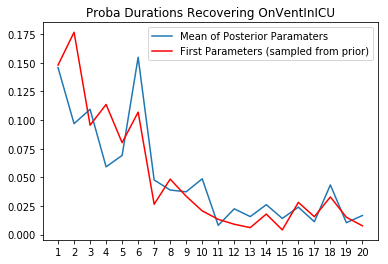

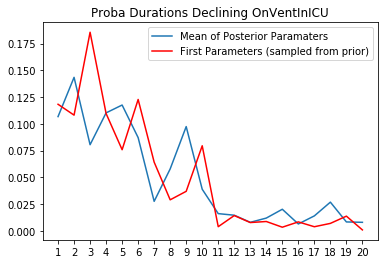

In [4]:
for state in states:
    plt.figure(figsize=(4, 3))
    plt.hist(results['proba_Recovering_given_%s' % state])
    plt.xticks([0.0, 0.25, 0.50, 0.75, 1.0] + [first_theta['proba_Recovering_given_%s' % state]], rotation=60)
    plt.title('proba_Recovering_given_%s' % state)
    plt.xlim((0, 1))
    plt.show()
    
    if state != 'Presenting':
        for health in ['Recovering', 'Declining']:
            mean_durs = [np.mean(results['pmf_duration_%s_%s' % (health, state)][dur]) for dur in durations]
            first_durs = [first_theta['pmf_duration_%s_%s' % (health, state)][dur] for dur in durations]
            plt.plot(durations, mean_durs, label='Mean of Posterior Paramaters')
            plt.plot(durations, first_durs, c='r', label='First Parameters (sampled from prior)')
            plt.title("Proba Durations %s %s" % (health, state))
            plt.legend()
            plt.show()
#             fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(12, 15), sharey=False)
#             fig.suptitle("     Proba Durations %s %s" % (health, state), y=1.0, fontsize=13)
#             ax = ax.flatten()
#             for i, dur in enumerate(durations):
#                 ax[i].hist(results['pmf_duration_%s_%s' % (health, state)][dur], bins=5)
#                 ax[i].set_title('%s days' % (dur))
#                 ax[i].set_xlim((0, 1))
#                 ax[i].set_xticks([0.0, 0.25, 0.50, 0.75, 1.0] + [first_theta['pmf_duration_%s_%s' % (health, state)][dur]])
#                 ax[i].tick_params(rotation=60)
#             plt.show()